In [109]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations

df = pd.read_csv('data/heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# select features for scaling and Isomap
features = ['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak','ca']

# combinations = list(combinations(features, 2))

In [111]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df[features])
df_scaled = pd.DataFrame(scaled, columns=features)

df_scaled.head(5)

,age,cp,trestbps,chol,thalach,oldpeak,ca
0,-0.268437,-0.915755,-0.377636,-0.659332,0.821321,-0.060888,1.209221
1,-0.158157,-0.915755,0.479107,-0.833861,0.255968,1.727137,-0.731971
2,1.716595,-0.915755,0.764688,-1.396233,-1.048692,1.301417,-0.731971
3,0.724079,-0.915755,0.936037,-0.833861,0.516900,-0.912329,0.238625
4,0.834359,-0.915755,0.364875,0.930822,-1.874977,0.705408,2.179817


In [112]:
X = df_scaled.values
color = df['target'].values

# Apply Isomap
isomap = Isomap(n_neighbors=10, n_components=2)
X_isomap = isomap.fit_transform(X)

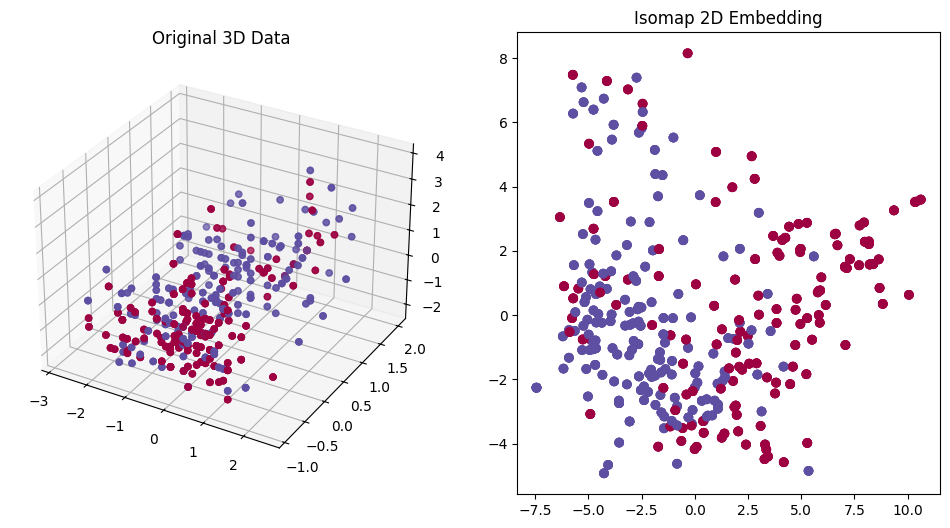

In [113]:
# Plot original data
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title('Original 3D Data')

# Plot Isomap result
ax = fig.add_subplot(122)
ax.scatter(X_isomap[:, 0], X_isomap[:, 1], c=color, cmap=plt.cm.Spectral)
ax.set_title('Isomap 2D Embedding')
plt.show()